# Data Processing

SalesDate
2016-01-04    3
2016-01-11    1
2016-01-18    3
2016-01-25    4
2016-02-01    4
Name: Quantity, dtype: int64


/home/manuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


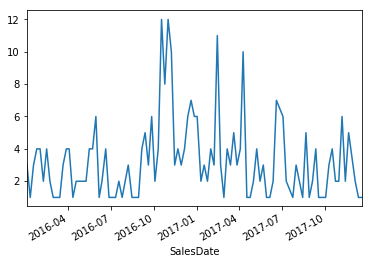

In [1]:
# line plot of time series
from pandas import Series
from matplotlib import pyplot
# load dataset
series = Series.from_csv('Data C.csv', header=0).convert_objects(convert_numeric=True)
# display first few rows
print(series.head(5))
# line plot of dataset
series.plot()
pyplot.show()

# Optimized Persistence Forecast

(97,)
p=1 RMSE:3.099
p=2 RMSE:3.345
p=3 RMSE:3.276
p=4 RMSE:3.260
p=5 RMSE:3.192
p=6 RMSE:3.017
p=7 RMSE:2.958
p=8 RMSE:2.784
p=9 RMSE:3.541
p=10 RMSE:3.491
p=11 RMSE:3.640
p=12 RMSE:3.940
p=13 RMSE:3.835
p=14 RMSE:3.156
p=15 RMSE:3.388
p=16 RMSE:3.789
p=17 RMSE:3.458
p=18 RMSE:3.702
p=19 RMSE:3.860
p=20 RMSE:3.461
p=21 RMSE:3.982
p=22 RMSE:3.680
p=23 RMSE:3.851


/home/manuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


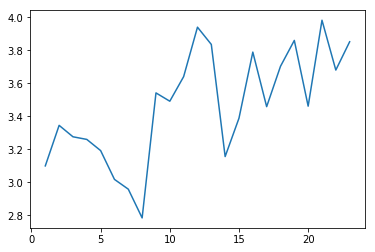

In [6]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('Data C.csv', header=0).convert_objects(convert_numeric=True)
# prepare data
X = series.values
print(X.shape)
train, test = X[0:49], X[49:97]

persistence_values = range(1, 24)
scores = list()
for p in persistence_values:
	# walk-forward validation
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		# make prediction
		yhat = history[-p]
		predictions.append(yhat)
		# observation
		history.append(test[i])
	# report performance
	rmse = sqrt(mean_squared_error(test, predictions))
	scores.append(rmse)
	print('p=%d RMSE:%.3f' % (p, rmse))
# plot scores over persistence values
pyplot.plot(persistence_values, scores)
pyplot.show()

# Evaluate Model

/home/manuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


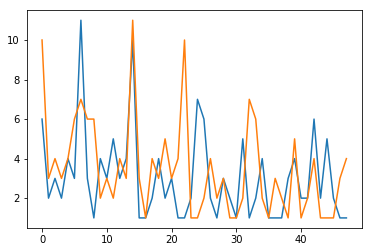

In [19]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('Data C.csv', header=0).convert_objects(convert_numeric=True)
# prepare data
X = series.values
train, test = X[0:49], X[49:97]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	yhat = history[-8]
	predictions.append(yhat)
	# observation
	history.append(test[i])
# plot predictions vs observations
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()